# Text to Image

In [1]:
import base64
import io
import json
import os
import sys
import boto3
from PIL import Image

module_path = ".."
sys.path.append(os.path.abspath(module_path))
from utils import bedrock, print_ww

In [ ]:
module_path = ".."
sys.path.append(os.path.abspath(module_path))
from utils import bedrock, print_ww

In [ ]:
bedrock_runtime = boto3.client(
    service_name='bedrock-runtime', 
    aws_access_key_id=os.getenv('aws_access_key_id'),
    aws_secret_access_key=os.getenv('aws_secret_access_key'),
    region_name='us-west-2'
)

In [2]:
prompt = "a beautiful futuristic city"
negative_prompts = [
    "poorly rendered",
    "poor background details",
    "deformed city"
    "poorly drawn futuristic city",
    "disfigured city features",
]
style_preset = "cinematic"
clip_guidance_preset = "FAST_BLUE"
sampler = "K_DPMPP_2S_ANCESTRAL"
width = 768

In [3]:
def create_request_payload(prompt_text, negative_prompt_list, style_preset_value, clip_guidance_value, sampler_value, image_width):
    positive_prompt = [{"text": prompt_text, "weight": 1.0}]
    negative_prompts = [{"text": np, "weight": -1.0} for np in negative_prompt_list]
    
    payload_data = {
        "text_prompts": positive_prompt + negative_prompts,
        "cfg_scale": 5,
        "seed": 460000,
        "steps": 50,
        "style_preset": style_preset_value,
        "clip_guidance_preset": clip_guidance_value,
        "sampler": sampler_value,
        "width": image_width,
    }
    
    return json.dumps(payload_data)

success
iVBORw0KGgoAAAANSUhEUgAAAwAAAAIACAIAAAC6lJxtAAAENmVYSWZNTQAqAAAACAAGAQAABAAAAAEA...


In [ ]:
def execute_model(runtime, payload, model_identifier):
    response = runtime.invoke_model(body=payload, modelId=model_identifier)
    return json.loads(response.get("body").read())

In [ ]:
request_payload = create_request_payload("a beautiful futuristic city", negative_prompts, style_preset, clip_guidance_preset, sampler, width)

In [ ]:
model_identifier = "stability.stable-diffusion-xl"
runtime_response = execute_model(bedrock_runtime, request_payload, model_identifier)

In [ ]:
print(runtime_response["result"])
image_base64_string = runtime_response["artifacts"][0].get("base64")
print(f"{image_base64_string[0:80]}...")

In [ ]:
os.makedirs("data", exist_ok=True)
image_1 = Image.open(io.BytesIO(base64.decodebytes(bytes(image_base64_string, "utf-8"))))
image_1.save("data/image_1.png")

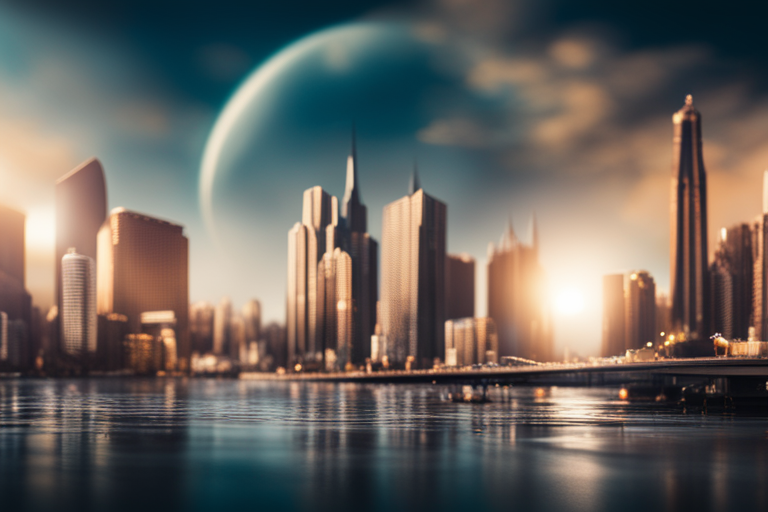

In [4]:
image_1